# Classification Evaluation

We will create a basic **Logistic Regression** model in order to practice different evaluation metrics. We will use the `diabetes.csv` dataset we have worked with before.

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [2]:
# load data into pandas
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)

In [3]:
# export target and predictors
# target
Y = df["class"].values
# predictors
X = df.drop("class",axis=1).values

In [4]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [6]:
print(Y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

Let's split now into `train` and `test` datasets. 

In [7]:
# splitting into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=.25, random_state=7)

Let's create the model and train it using `fit`.

In [9]:
# model creation
model = LogisticRegression(solver='liblinear')
# fitting model
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Now, let's gather the predictions and the probabilities that the model produces on the `test` dataset.

In [10]:
# creating prediction: labels
predicted = model.predict(X_test)

# creating prediction: probability
predicted_probas = model.predict_proba(X_test)

In [12]:
predicted

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

You can see that variable `predicted` is one dimensional and contains the predicted label for each observation in the `test` set.

In [14]:
predicted_probas

array([[0.87743742, 0.12256258],
       [0.2292271 , 0.7707729 ],
       [0.30224771, 0.69775229],
       [0.74931543, 0.25068457],
       [0.63215091, 0.36784909],
       [0.52184149, 0.47815851],
       [0.89162754, 0.10837246],
       [0.64289432, 0.35710568],
       [0.11852925, 0.88147075],
       [0.80704434, 0.19295566],
       [0.16766741, 0.83233259],
       [0.8689381 , 0.1310619 ],
       [0.41759808, 0.58240192],
       [0.24092975, 0.75907025],
       [0.55946235, 0.44053765],
       [0.79069648, 0.20930352],
       [0.72368368, 0.27631632],
       [0.81193844, 0.18806156],
       [0.78848342, 0.21151658],
       [0.82913873, 0.17086127],
       [0.59434325, 0.40565675],
       [0.71639923, 0.28360077],
       [0.29838967, 0.70161033],
       [0.46389619, 0.53610381],
       [0.73735571, 0.26264429],
       [0.7451564 , 0.2548436 ],
       [0.86574847, 0.13425153],
       [0.55796962, 0.44203038],
       [0.70302182, 0.29697818],
       [0.65397802, 0.34602198],
       [0.

Variable `predicted_probas` is two dimensional and contains the predicted probabilities for both classes, 0 and 1 respectively, for each observation.

### Accuracy

This is the most common evaluation metric for classification problems. It is also the most **misused**.  

It is only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.

In [17]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test, predicted)

# print accuracy
print("Accuracy: ", accuracy)

Accuracy:  0.78125


**F1-score**

The **F1-score** can be interpreted as a weighted average of **precision** and **recall**. It is a nice option when we are not sure which one is more important for us and how to find a correct threshold.

In [20]:
# import f1_score from sklearn
from sklearn.metrics import f1_score

# compute F1-score
f1_score = f1_score(y_test, predicted)

# print F1-score
print("F1-score: ", f1_score)

F1-score:  0.6379310344827587


**ROC**

The Receiver operating characteristic or **ROC** is a summary of our confusion matrices if we tried different parameters. 

We can also compare different models. The model that has the highest Area Under the Curve (**AUC**) is the model that we believe might work better with our data.

In [23]:
# import required metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt


# keep probabilities for the positive outcome only
lr_probs = predicted_probas[:, 1]
# calculate AUC
lr_auc = roc_auc_score(y_test, lr_probs)
# Print AUC
print(f'AUC={lr_auc}')

# print AUC-score
print(lr_auc)

AUC=0.8319672131147541
0.8319672131147541


Now, we can check the **ROC** curve by plotting it.

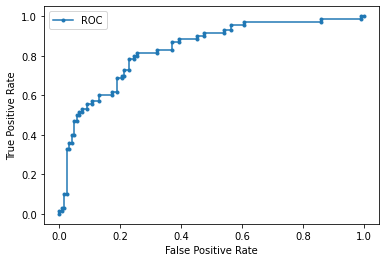

In [25]:
# calculate roc curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='ROC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In roc_auc_score we use probabilities (y_proba) instead of class labels. If we passed class labels no errors would be shown but the score would be inaccurate.

If you want to learn more about the ROC and AUC, I recommend this easy [video](https://www.youtube.com/watch?v=4jRBRDbJemM)